In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LassoLars
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, d2_pinball_score
from sklearn.metrics import max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance


In [218]:
def generate_prediction(classifier_model, train_x, train_y, test_x):

    trained_model = classifier_model.fit(train_x, train_y)
    
    prediction = trained_model.predict(test_x)

    return prediction


def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):    
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)

    ax.plot(stock_df['unix_time'], stock_df['close'], label='actual', c='b')
    ax.plot(test_x['unix_time'], test_y, label='test', c='r')
    ax.plot(test_x['unix_time'], prediction_y, label='prediction', c='g')

    plt.tight_layout()
    plt.legend()
    plt.show()


def calculate_metrics(y_true, y_pred, model_name):
    metric_list = [r2_score, explained_variance_score, d2_pinball_score, max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance]
    metric_names = ['r2_score', 'explained_variance_score', 'd2_pinball_score', 'max_error', 'mean_squared_error', 'median_absolute_error', 'mean_absolute_percentage_error', 'mean_poisson_deviance']

    print(f"Model: {model_name}")
    
    for idx, metric in enumerate(metric_list):
        metric_result = metric(y_true, y_pred)
        print(f"{metric_names[idx]}: {metric_result}")

    print("------------\n\n")


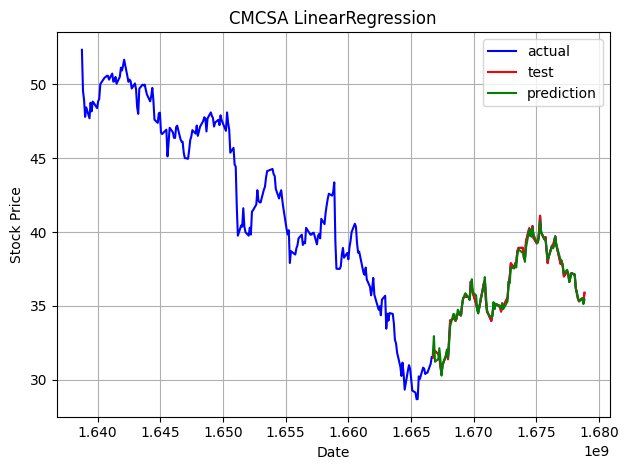

Model: CMCSA LinearRegression
r2_score: 0.9898075005493681
explained_variance_score: 0.9898174106046788
d2_pinball_score: 0.9102863590107715
max_error: 0.9872443224104472
mean_squared_error: 0.06637769347575931
median_absolute_error: 0.14902385649501682
mean_absolute_percentage_error: 0.005313497505665295
mean_poisson_deviance: 0.0019042893038897872
------------




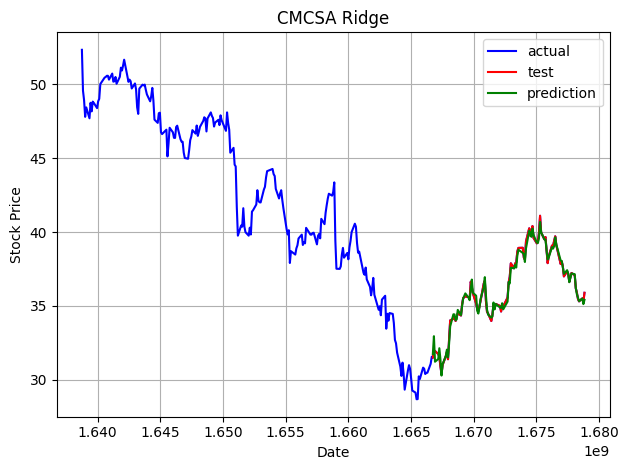

Model: CMCSA Ridge
r2_score: 0.9895524854093645
explained_variance_score: 0.989642093537399
d2_pinball_score: 0.9083408024957694
max_error: 0.9809246781509273
mean_squared_error: 0.06803845557604932
median_absolute_error: 0.1428871687790938
mean_absolute_percentage_error: 0.005414398677040599
mean_poisson_deviance: 0.001944984623383661
------------




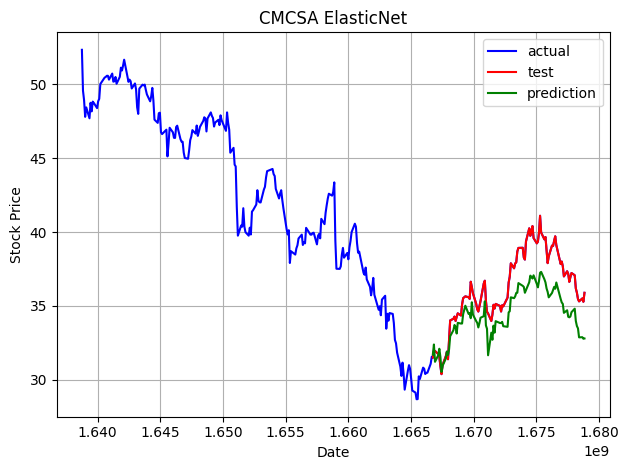

Model: CMCSA ElasticNet
r2_score: 0.3219878134729195
explained_variance_score: 0.821942804587409
d2_pinball_score: 0.12012264434873865
max_error: 3.8608996733074292
mean_squared_error: 4.415490558337324
median_absolute_error: 2.023902323037781
mean_absolute_percentage_error: 0.049628288570984946
mean_poisson_deviance: 0.12215446215154913
------------




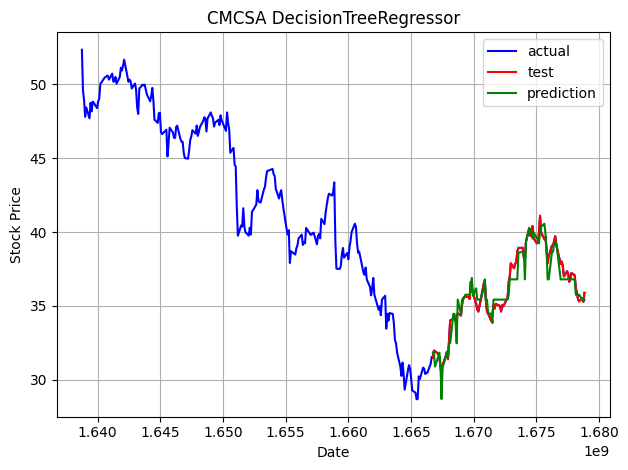

Model: CMCSA DecisionTreeRegressor
r2_score: 0.9335385469646675
explained_variance_score: 0.9368557350810912
d2_pinball_score: 0.7650641184334306
max_error: 1.8900000000000006
mean_squared_error: 0.43282395833333404
median_absolute_error: 0.360000000000003
mean_absolute_percentage_error: 0.013640011852938658
mean_poisson_deviance: 0.012157687996984246
------------




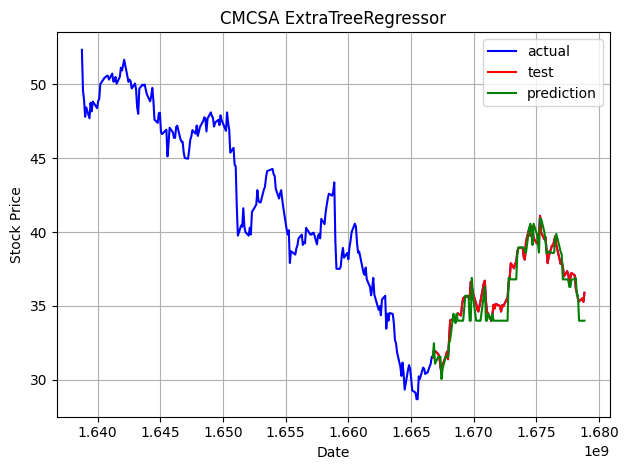

Model: CMCSA ExtraTreeRegressor
r2_score: 0.9007605621140489
explained_variance_score: 0.9226669953795634
d2_pinball_score: 0.6990642174580382
max_error: 2.6400000000000006
mean_squared_error: 0.6462875000000002
median_absolute_error: 0.5450000000000017
mean_absolute_percentage_error: 0.0174801115637299
mean_poisson_deviance: 0.018220159856235707
------------




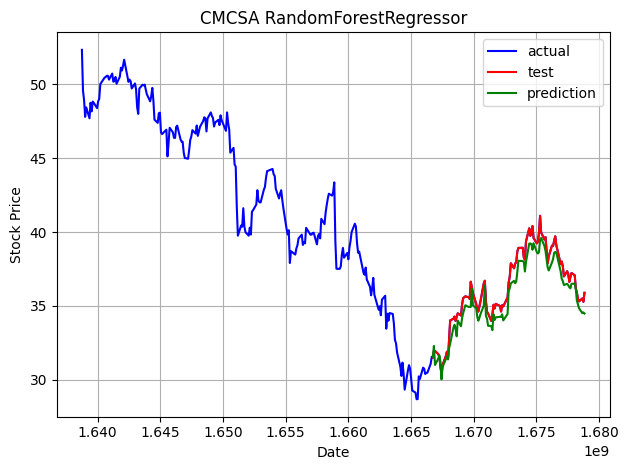

Model: CMCSA RandomForestRegressor
r2_score: 0.892573562010995
explained_variance_score: 0.9729221086403154
d2_pinball_score: 0.6480952616725263
max_error: 1.7135000000000034
mean_squared_error: 0.6996045677083353
median_absolute_error: 0.7296999999999834
mean_absolute_percentage_error: 0.020203352592236767
mean_poisson_deviance: 0.01929722304295319
------------




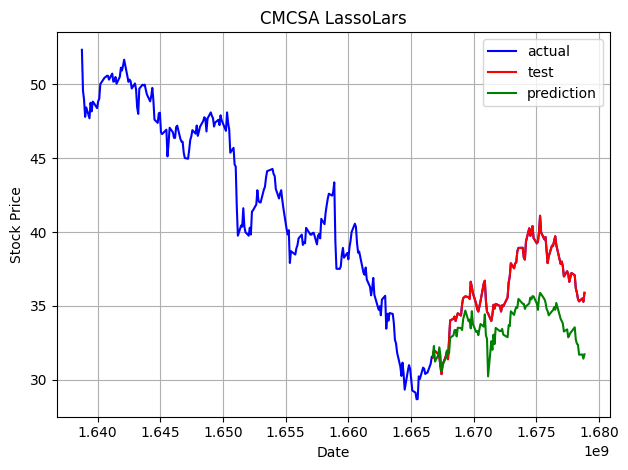

Model: CMCSA LassoLars
r2_score: -0.4310431142177873
explained_variance_score: 0.6338833087895743
d2_pinball_score: -0.2770799245444193
max_error: 5.224358147717837
mean_squared_error: 9.3195336086336
median_absolute_error: 3.114264019688619
mean_absolute_percentage_error: 0.07198203326476732
mean_poisson_deviance: 0.26369843827467127
------------




In [219]:

ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'

social_sentiment_csv_file_path = './data/social_media_sentiment.csv'

insider_sentiment_csv_file_path = './data/insider_sentiment.csv'

daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == ticker_symbol].drop('date', axis=1).drop('symbol', axis = 1)

data_x = daily_stock_df.loc[:,daily_stock_df.columns != 'close' ]
data_y = daily_stock_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

models = [LinearRegression(), Ridge(), ElasticNet(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), LassoLars()]
prediction_list = []

for model in models:
    prediction = generate_prediction(model, x_train, y_train, x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_graph(daily_stock_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])
